**Random Forest algorithm to classify network traffic**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data=pd.read_csv("/content/drive/MyDrive/Imbalanced.csv")

In [ ]:
# Step 1: Select all feature columns except 'ProtocolName'
feature_columns = data.columns.drop('ProtocolName')

# Step 2: Create the feature matrix X by selecting those columns and converting to float
X = data[feature_columns].apply(pd.to_numeric, errors='coerce')

# Step 3: Assign the target variable Y as the 'ProtocolName' column
Y = data['ProtocolName']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

In [ ]:
%%time
dt = DecisionTreeClassifier()
dt.fit(X_train , y_train)

CPU times: user 25.7 s, sys: 80.4 ms, total: 25.7 s
Wall time: 25.8 s


DecisionTreeClassifier()

In [ ]:
dt.tree_.node_count, dt.tree_.max_depth

(137, 18)

In [ ]:
%time
dt.score(X_test, y_test)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.39 µs


0.9998909930532845

In [ ]:
%time
rf = RandomForestClassifier()
rf.fit(X_train , y_train)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.39 µs


RandomForestClassifier()

In [ ]:
# Access the first tree in the random forest
first_tree = rf.estimators_[0]

# Get the number of nodes and maximum depth of the first tree
node_count = first_tree.tree_.node_count
max_depth = first_tree.tree_.max_depth

print(node_count, max_depth)


30831 43


In [ ]:
  rf.score(X_test, y_test)

0.9889803886593137

In [ ]:
rf = RandomForestClassifier(max_depth=60, n_estimators=100, max_features='sqrt', criterion='entropy')

In [ ]:
%%time
rf.fit(X_train, y_train)

CPU times: user 10min 16s, sys: 1.97 s, total: 10min 18s
Wall time: 10min 38s


RandomForestClassifier(criterion='entropy', max_depth=60)

In [ ]:
%%time
rf.score(X_test, y_test)

CPU times: user 4.95 s, sys: 1.29 s, total: 6.24 s
Wall time: 6.23 s


0.9930334651326417

In [ ]:
%%time
y_pred = rf.predict(X_test)

CPU times: user 5.58 s, sys: 1.31 s, total: 6.89 s
Wall time: 6.91 s


In [ ]:
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                   precision    recall  f1-score   support

           99TAXI       0.00      0.00      0.00         1
           AMAZON       0.98      0.98      0.98      2381
            APPLE       0.99      0.98      0.99      2384
     APPLE_ICLOUD       1.00      1.00      1.00      2380
     APPLE_ITUNES       1.00      1.00      1.00      2430
           CITRIX       1.00      0.25      0.40         4
    CITRIX_ONLINE       1.00      1.00      1.00         2
       CLOUDFLARE       1.00      1.00      1.00      2447
    CONTENT_FLASH       1.00      1.00      1.00      2454
           DEEZER       1.00      0.65      0.79        20
              DNS       1.00      1.00      1.00      2356
          DROPBOX       0.99      0.99      0.99      2394
         EASYTAXI       1.00      1.00      1.00      2384
             EBAY       1.00      0.99      0.99      2397
          EDONKEY       1.00      0.86      0.92        21
         FACEBOOK       1.00      0.98      0.99      2

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


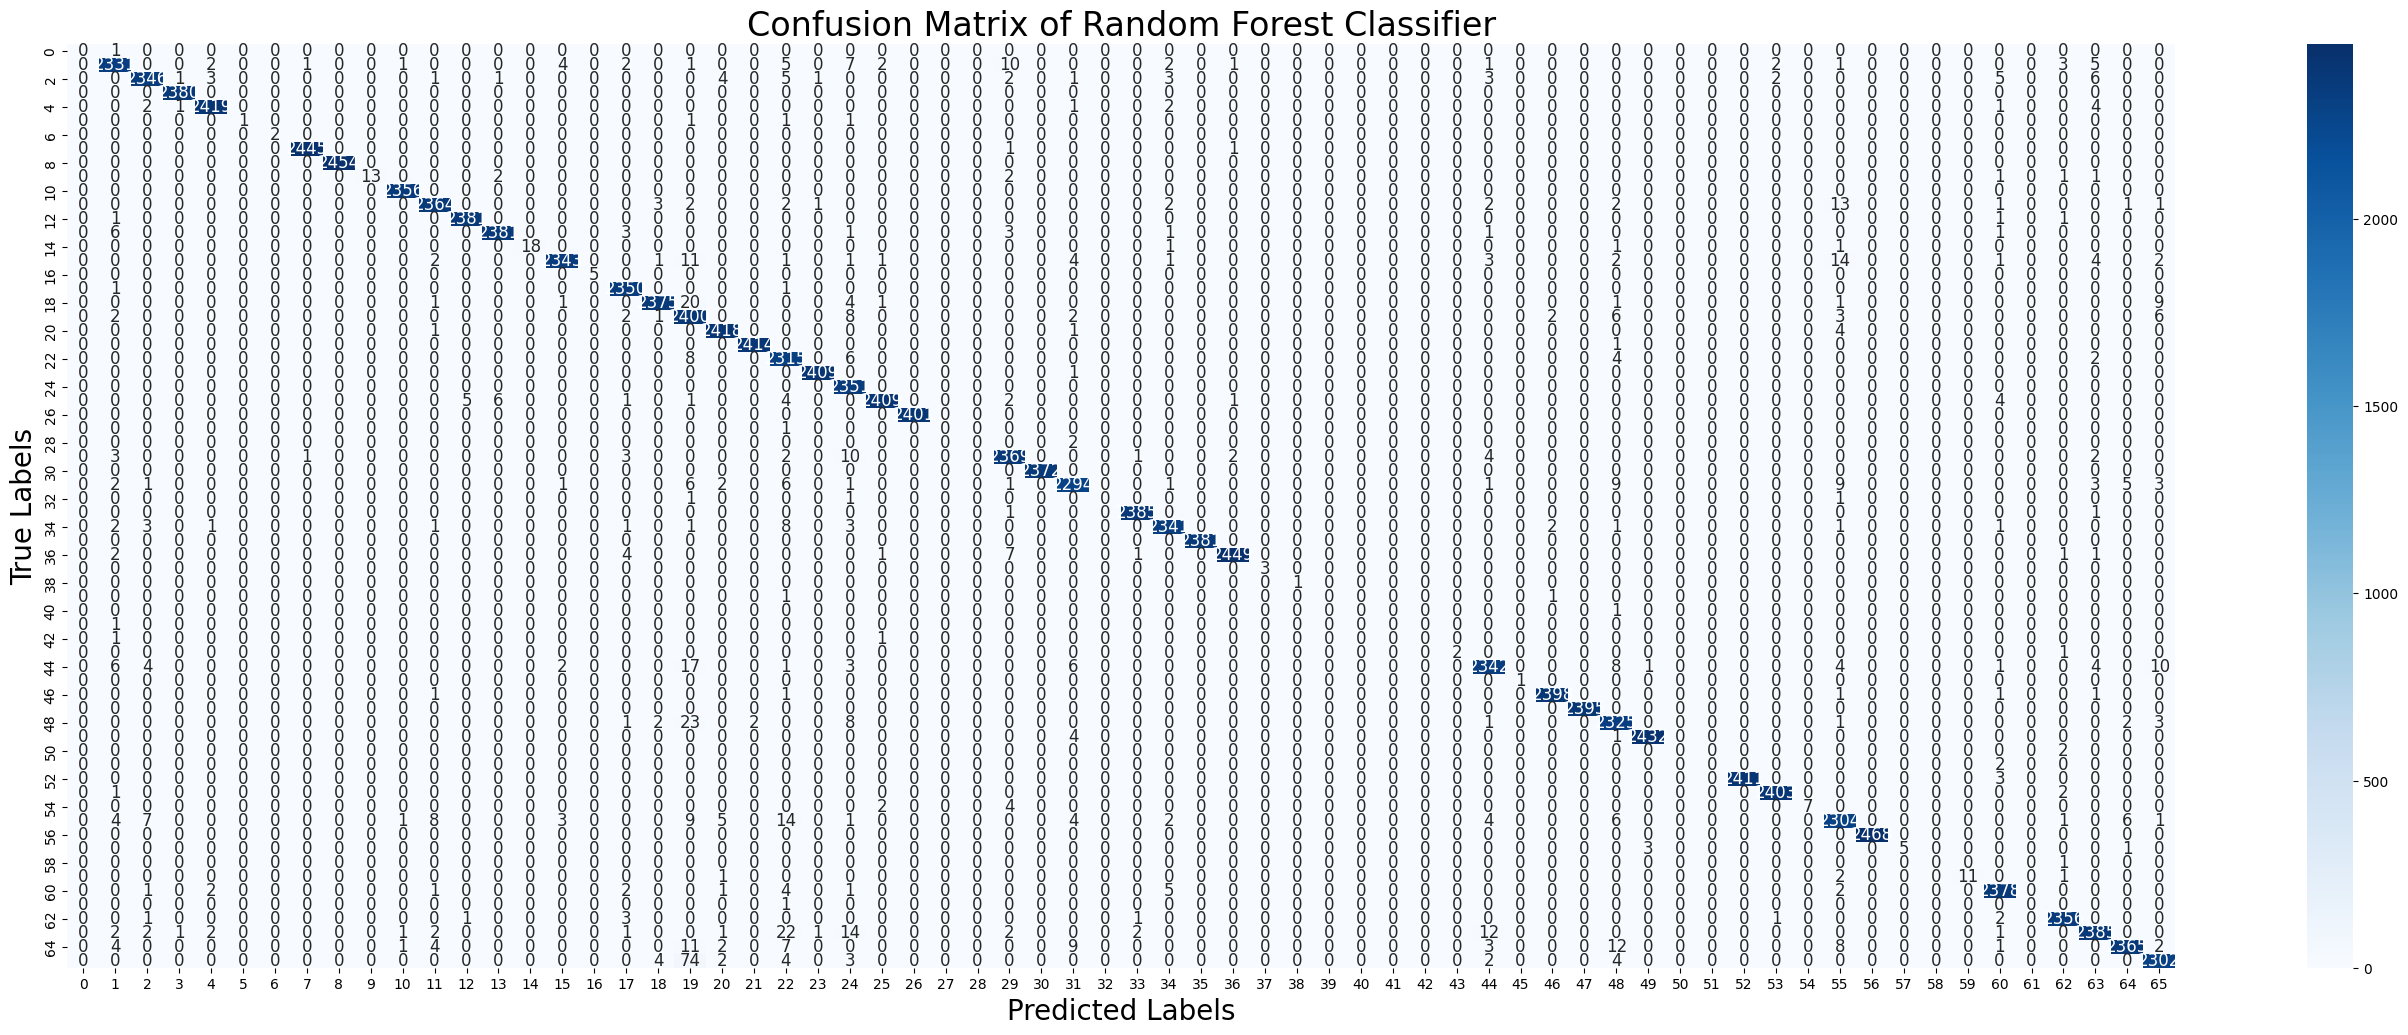

In [ ]:

# Step 1: Predict the labels for the test set
y_pred = rf.predict(X_test)

# Step 2: Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

# Step 3: Set up the plot
fig, ax = plt.subplots(figsize=(34, 12))
sns.heatmap(cf_matrix, annot=True, ax=ax, fmt='d', annot_kws={"size": 12}, cmap='Blues')

# Step 4: Add labels and title
ax.set_xlabel('Predicted Labels', fontsize=20)
ax.set_ylabel('True Labels', fontsize=20)
ax.set_title('Confusion Matrix of Random Forest Classifier', fontsize=24)

# Step 5: Save the plot to a file
plt.savefig('confusion_matrix_random_forest.png', bbox_inches='tight')  # Save with tight bounding box
plt.show()  # Display the plot


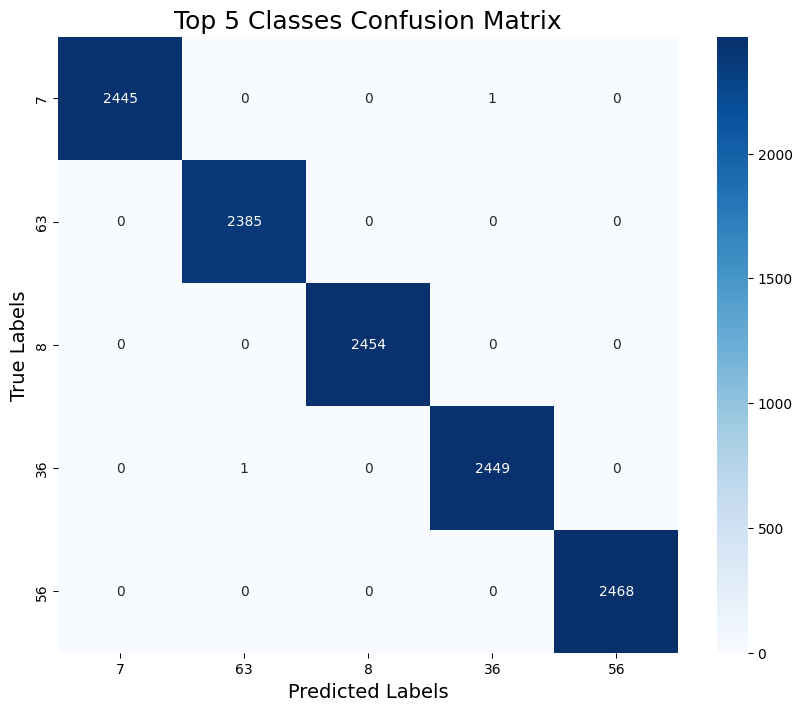

In [ ]:

# Assuming y_test and y_pred are already defined from your previous predictions
cm = confusion_matrix(y_test, y_pred)

# Step 1: Identify the top 5 classes based on their occurrences in the confusion matrix
class_indices = np.argsort(np.sum(cm, axis=1))[-5:]  # Get indices of the top 5 classes

# Step 2: Extract the confusion matrix for these top classes
cm_top_5 = cm[class_indices][:, class_indices]

# Step 3: Plot the confusion matrix for the top 5 classes
plt.figure(figsize=(10, 8))
sns.heatmap(cm_top_5, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_indices, yticklabels=class_indices)
plt.title('Top 5 Classes Confusion Matrix', fontsize=18)
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)
plt.show()


In [ ]:
import numpy as np

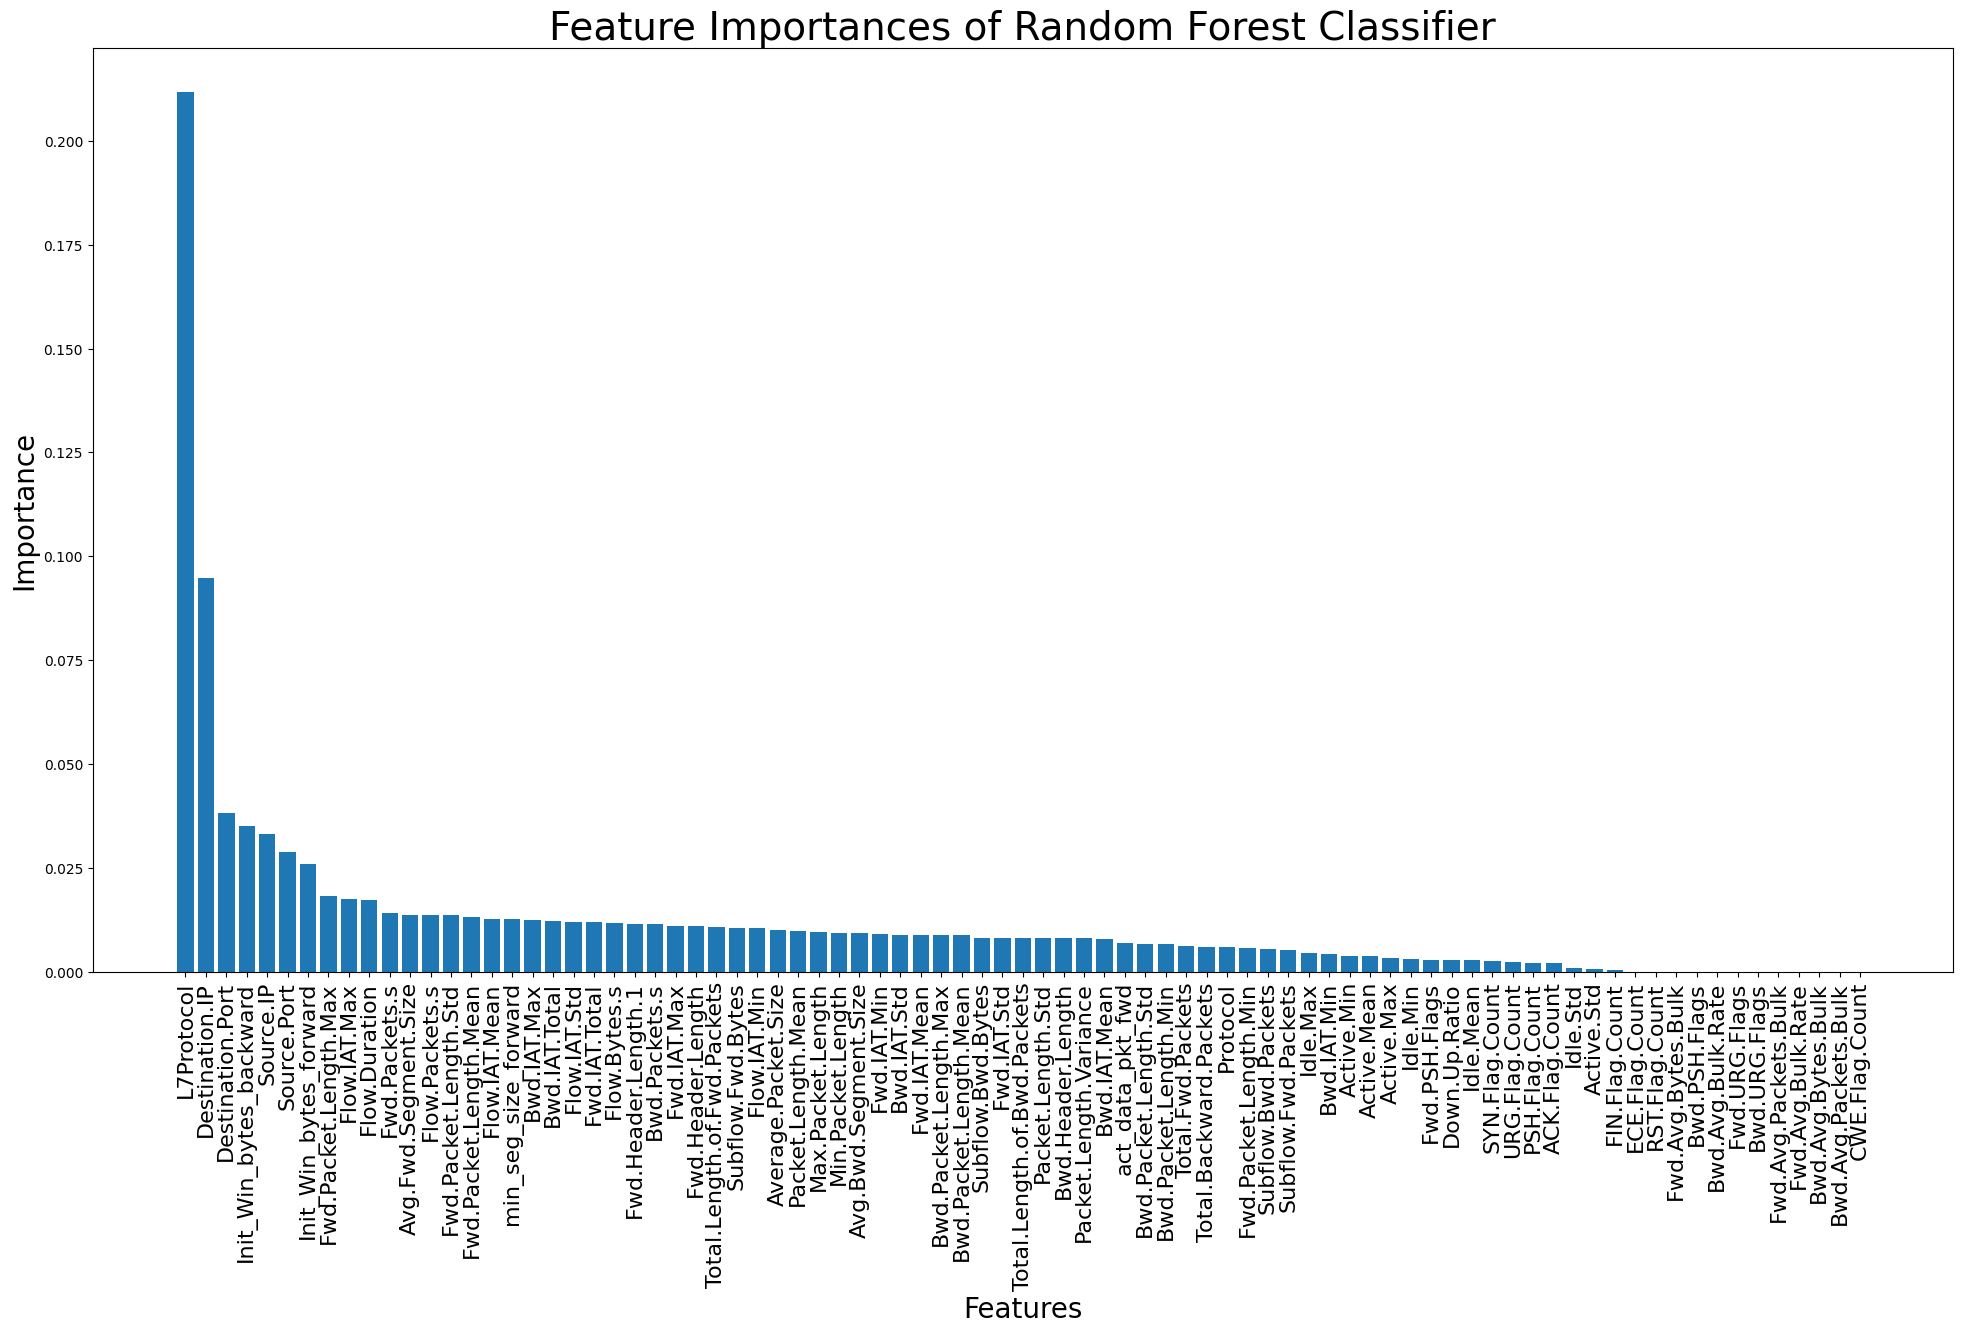

In [ ]:


# Assuming you have already trained your Random Forest model (rf) and have X_train
# Get the feature importances
importances = rf.feature_importances_

# Sort the feature importances in descending order and get the indices
indices = np.argsort(importances)[::-1]

# Get the names of the features sorted by importance
names = [feature_columns[i] for i in indices]

# Plot the feature importances
plt.figure(figsize=(24, 12))
plt.title("Feature Importances of Random Forest Classifier", fontsize=28)
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), names, rotation=90, fontsize=16)
plt.ylabel("Importance", fontsize=20)
plt.xlabel("Features", fontsize=20)

# Save the plot to a file
plt.savefig("RF_features.png", bbox_inches='tight')  # Use bbox_inches='tight' to avoid clipping
plt.show()  # Display the plot
